In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./data/train.csv')

## Pre-Clean EDA

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df[df['Age'].isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [5]:
set([ x[0] for x in df['Cabin'].dropna()])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [6]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df.corrwith(df['Survived'])

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
dtype: float64

In [9]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [10]:
mask = df['Age'] < 1
df[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


## Cleaning

In [11]:
def fun_map(x):
    if type(x) == float:
        x = 'N'
    else:
        x = x[0]
        
    return x

df['Cabin_letter'] = df['Cabin'].map(lambda x: fun_map(x))

In [12]:
def fun_map(x):
    if x < 0.75:
        x = 0
    elif x <= 1:
        x = 1
    elif x > 1 and (x % 1.0) == 0.5:
        x = int(x - 0.5)
    elif np.isnan(x):
        x = -1
    else:
        x = int(x)
    return x

df['Age'] = df['Age'].map(lambda x: fun_map(x))

In [13]:
df.to_csv('./data/titanic_tableau.csv')

In [14]:
df = pd.get_dummies(df.drop(['Name', 'Ticket', 'Cabin'], axis = 1))

In [15]:
# Dropping extranious columns
df.drop(['Sex_male', 'Embarked_Q', 'Cabin_letter_G'], axis = 1, inplace = True)

In [16]:
df.to_csv('./data/titanic_modeling.csv')

## Post-Clean EDA

In [17]:
df.corrwith(df['Survived'])

PassengerId      -0.005007
Survived          1.000000
Pclass           -0.338481
Age               0.012812
SibSp            -0.035322
Parch             0.081629
Fare              0.257307
Sex_female        0.543351
Embarked_C        0.168240
Embarked_S       -0.155660
Cabin_letter_A    0.022287
Cabin_letter_B    0.175095
Cabin_letter_C    0.114652
Cabin_letter_D    0.150716
Cabin_letter_E    0.145321
Cabin_letter_F    0.057935
Cabin_letter_N   -0.316912
Cabin_letter_T   -0.026456
dtype: float64

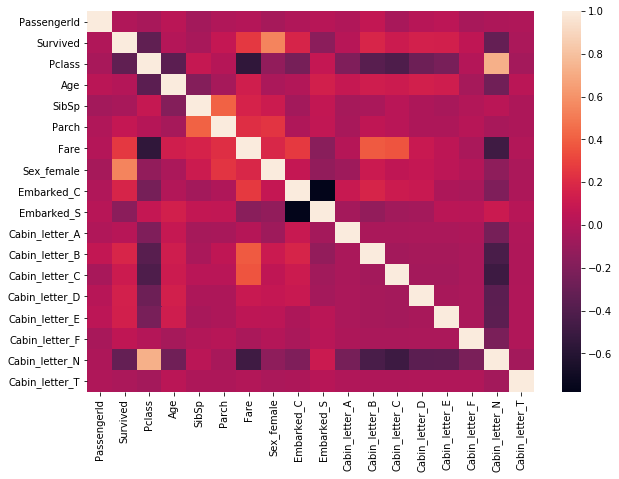

In [18]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr());

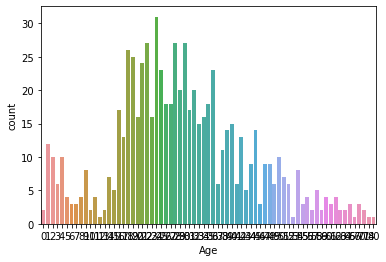

In [19]:
sns.countplot(df[df['Age'] >= 0]['Age']);

## Extra Mile Stuff (For future/next time)

 - In the future, split off the two df's earlier.  Rather than saving it now and adjusting it later-ish

In [20]:
#df[df['Age'].isna()]['Name'].tail(20)
# This was originally before the "Name" column was dropped.

Solutions For Filling Age Na's:
 - Regex out the titles, correlate those titles to the other titles.
 - Grab data from Encylopedia Titanica?  (It appears that they have all the age info.)